In [ ]:
!python3 /content/mcq_training_lightning_1.py --model_name_or_path bert-base-uncased --hidden_dropout_prob 0.15 --max_input_seq_length 128 --output_dir ./  --predictions_file predictions.csv --TRAIN_FILE /content/data_hard.csv  --DEV_FILE /content/devnewdata_2.csv --train_batch_size 8 --eval_batch_size 8 --max_train_samples -1 --num_train_epochs 5 --gradient_accumulation_steps 1 --seed 42 --save_top_k -1 --learning_rate 5e-05 --write_dev_predictions

Training arguments Namespace(adam_epsilon=1e-08, distributed_backend=None, early_stop_callback=False, fp_16=False, max_grad_norm=1.0, n_gpu=-1, num_workers=8, opt_level='O1', warmup_steps=0, weight_decay=0.0)
--------------------
Model arguments Namespace(hidden_dropout_prob=0.15, max_input_seq_length=128, model_name_or_path='bert-base-uncased')
--------------------
Other arguments Namespace(DEV_FILE='/content/devnewdata_2.csv', TRAIN_FILE='/content/data_hard.csv', do_fast_dev_run=False, eval_batch_size=8, gradient_accumulation_steps=1, learning_rate=5e-05, limit_train_batches=-1, limit_val_batches=-1, max_train_samples=-1, num_train_epochs=5, output_dir='./', predictions_file='predictions.csv', save_last=False, save_top_k=-1, seed=42, train_batch_size=8, write_dev_predictions=True)
--------------------
Global seed set to 42
Downloading: 100% 28.0/28.0 [00:00<00:00, 23.7kB/s]
Downloading: 100% 570/570 [00:00<00:00, 431kB/s]
Downloading: 100% 226k/226k [00:00<00:00, 320kB/s]
Downloading

In [ ]:
!pip install pytorch_lightning

     |████████████████████████████████| 524 kB 5.2 MB/s 
     |████████████████████████████████| 329 kB 42.6 MB/s 
     |████████████████████████████████| 829 kB 32.7 MB/s 
     |████████████████████████████████| 596 kB 48.5 MB/s 
     |████████████████████████████████| 132 kB 43.7 MB/s 
     |████████████████████████████████| 1.1 MB 41.4 MB/s 
     |████████████████████████████████| 192 kB 45.7 MB/s 
     |████████████████████████████████| 271 kB 52.4 MB/s 
     |████████████████████████████████| 160 kB 49.1 MB/s 
  Created wheel for future: filename=future-0.18.2-py3-none-any.whl size=491070 sha256=9811f29020c48b3bc75efd1e0ed4837dfac5e7f7c11c9259703aa3a988e839b5
  Stored in directory: /root/.cache/pip/wheels/56/b0/fe/4410d17b32f1f0c3cf54cdfb2bc04d7b4b8f4ae377e2229ba0
Successfully built future
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Attempting uninstall: future
    Found exis

In [ ]:
!pip install transformers

     |████████████████████████████████| 3.1 MB 5.3 MB/s 
     |████████████████████████████████| 895 kB 39.3 MB/s 
     |████████████████████████████████| 61 kB 480 kB/s 
     |████████████████████████████████| 3.3 MB 39.0 MB/s 


In [ ]:
import pandas as pd
ep0 = pd.read_csv('/content/epoch_0_predictions.csv')
ep1 = pd.read_csv('/content/epoch_1_predictions.csv')
ep2 = pd.read_csv('/content/epoch_2_predictions.csv')
ep3 = pd.read_csv('/content/epoch_3_predictions.csv')
ep4 = pd.read_csv('/content/epoch_4_predictions.csv')

In [ ]:
import numpy as np
difficulty = []
confidence = []
for i in range(1954):
    val1 = ep0.iloc[i][int(ep0.iloc[i]['label'])+2]
    val2 = ep1.iloc[i][int(ep1.iloc[i]['label'])+2]
    val3 = ep2.iloc[i][int(ep2.iloc[i]['label'])+2]
    val4 = ep3.iloc[i][int(ep3.iloc[i]['label'])+2]
    val5 = ep4.iloc[i][int(ep4.iloc[i]['label'])+2]
    confidence.append((val1+val2+val3+val4+val5)/5)
    difficulty.append(np.std([val1,val2,val3,val4,val5]))

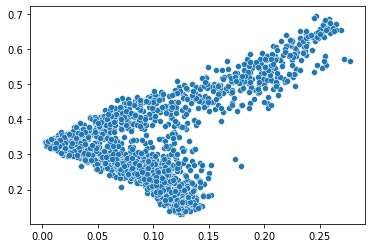

In [ ]:
import seaborn as sns
sns.scatterplot(x= difficulty, y = confidence)

In [ ]:
import pandas as pd
train_df_easy = pd.read_csv('/content/data_easy.csv')
train_df_ambi = pd.read_csv('/content/data_ambi.csv')
train_df_hard = pd.read_csv('/content/data_hard.csv')

In [ ]:
train_easy_100_hard_100 = pd.concat([train_df_easy, train_df_hard])

In [ ]:
train_easy_100_hard_100.to_csv('train_easy_100_hard_100.csv')

In [ ]:
!python3 /content/mcq_training_lightning_1.py --model_name_or_path bert-base-uncased --hidden_dropout_prob 0.15 --max_input_seq_length 128 --output_dir ./  --predictions_file predictions.csv --TRAIN_FILE /content/train_easy_100_hard_100.csv  --DEV_FILE /content/devnewdata_2.csv --train_batch_size 8 --eval_batch_size 8 --max_train_samples -1 --num_train_epochs 5 --gradient_accumulation_steps 1 --seed 42 --save_top_k -1 --learning_rate 5e-05 --write_dev_predictions

Training arguments Namespace(adam_epsilon=1e-08, distributed_backend=None, early_stop_callback=False, fp_16=False, max_grad_norm=1.0, n_gpu=-1, num_workers=8, opt_level='O1', warmup_steps=0, weight_decay=0.0)
--------------------
Model arguments Namespace(hidden_dropout_prob=0.15, max_input_seq_length=128, model_name_or_path='bert-base-uncased')
--------------------
Other arguments Namespace(DEV_FILE='/content/devnewdata_2.csv', TRAIN_FILE='/content/train_easy_100_hard_100.csv', do_fast_dev_run=False, eval_batch_size=8, gradient_accumulation_steps=1, learning_rate=5e-05, limit_train_batches=-1, limit_val_batches=-1, max_train_samples=-1, num_train_epochs=5, output_dir='./', predictions_file='predictions.csv', save_last=False, save_top_k=-1, seed=42, train_batch_size=8, write_dev_predictions=True)
--------------------
Global seed set to 42
Downloading: 100% 28.0/28.0 [00:00<00:00, 28.4kB/s]
Downloading: 100% 570/570 [00:00<00:00, 447kB/s]
Downloading: 100% 226k/226k [00:00<00:00, 2.00MB

In [ ]:
train_ambi_75_hard_100 = pd.concat([train_df_ambi.iloc[:900], train_df_hard])
train_ambi_75_hard_100.to_csv('train_ambi_75_hard_100.csv')

In [ ]:
!python3 /content/mcq_training_lightning_1.py --model_name_or_path bert-base-uncased --hidden_dropout_prob 0.15 --max_input_seq_length 128 --output_dir ./  --predictions_file predictions.csv --TRAIN_FILE /content/train_ambi_75_hard_100.csv  --DEV_FILE /content/devnewdata_2.csv --train_batch_size 8 --eval_batch_size 8 --max_train_samples -1 --num_train_epochs 5 --gradient_accumulation_steps 1 --seed 42 --save_top_k -1 --learning_rate 5e-05 --write_dev_predictions

Training arguments Namespace(adam_epsilon=1e-08, distributed_backend=None, early_stop_callback=False, fp_16=False, max_grad_norm=1.0, n_gpu=-1, num_workers=8, opt_level='O1', warmup_steps=0, weight_decay=0.0)
--------------------
Model arguments Namespace(hidden_dropout_prob=0.15, max_input_seq_length=128, model_name_or_path='bert-base-uncased')
--------------------
Other arguments Namespace(DEV_FILE='/content/devnewdata_2.csv', TRAIN_FILE='/content/train_ambi_75_hard_100.csv', do_fast_dev_run=False, eval_batch_size=8, gradient_accumulation_steps=1, learning_rate=5e-05, limit_train_batches=-1, limit_val_batches=-1, max_train_samples=-1, num_train_epochs=5, output_dir='./', predictions_file='predictions.csv', save_last=False, save_top_k=-1, seed=42, train_batch_size=8, write_dev_predictions=True)
--------------------
Global seed set to 42
Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMultipleChoice: ['cls.predictions.transform.LayerNorm